In [1]:
# GA species class

import numpy
class species:

    def __init__(self,species='chungu'):
        # rangu is more complexed animal, as compared to chungu
        if species == 'rangu':
            self.iq = numpy.random.randint(50, 100)
            self.eye_sight = numpy.random.randint(10, 50)
            self.avatar = 'Rangu : 🦎'
        else:
            self.iq = numpy.random.randint(10,100)
            self.eye_sight = numpy.random.randint(30, 50)
            self.avatar = 'Chungu : 🦎'
            
    def return_orgs(self):
        return {'species':self.avatar,'iq':self.iq,'vision':self.eye_sight}

In [2]:
import random
chungu_pool = [species().return_orgs() for x in range(100)]
rangu_pool = [species('rangu').return_orgs() for x in range(100)]
total_org_pool = chungu_pool + rangu_pool
random.shuffle(total_org_pool)
print(f"population size = {len(total_org_pool)}")


population size = 200


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

/home/akhil/Desktop/pyenv/GA/ga/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 129422 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/akhil/Desktop/pyenv/GA/ga/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 129422 missing from current font.
  font.set_text(s, 0, flags=flags)


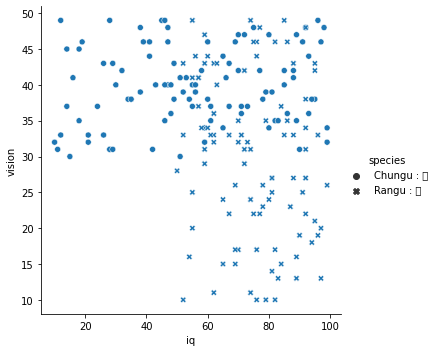

In [4]:

population = pd.DataFrame(total_org_pool)
#print(population.head())
population.head()
sns.relplot(x="iq", y="vision", style="species" ,data=population);

In [5]:
""" consider the enviorment is most faberable for organisum with high iq"""
""" f(x,y) =  10x**2+4y """
def fitness_function(org):
    print(org)
    return numpy.sqrt(10*org['iq']**2+4*org['vision'])

In [6]:
# selection
from numpy.random import randint
from numpy.random import rand
# random turnment selection
def selection(population, fitness_scores,step = 3):
    random_org = randint(len(population))
    for _ in range(0,len(population),step-1):
        if fitness_scores[_] > fitness_scores[random_org]:
            random_org = _
    return population[random_org]

In [7]:
def cross_over(p1,p2,p_cross):
    c1,c2 = p1.copy(),p2.copy()
    if rand() < p_cross:
        print(f"{p1} - {p2}")
        iq_min = min(p1['iq'],p2['iq'])
        iq_max = max(p1['iq'],p2['iq'])
        if(iq_min == iq_max):
            iq_max=iq_max+1
        # print(f"iq min {iq_min} and iq_max {iq_max}")
        vision_min = min(p1['vision'],p2['vision'])
        vision_max = max(p1['vision'],p2['vision'])
        if(vision_min == vision_max):
            vision_max=vision_max+1
        # print(f"iq min {vision_min} and iq_max {vision_max}")
        c1['iq'] = randint(iq_min,iq_max)
        c2['iq'] = randint(iq_min,iq_max)
        c1['vision'] = randint(vision_min,vision_max)
        c2['vision'] = randint(vision_min,vision_max)
    return [c1,c2]
    

In [8]:
def genetic_algo(population,generation,r_cross):
    
    best, best_eval = {'species':"Superior org",'iq':100,'vision':50},fitness_function(population[0])
    for gen in range(generation):
        fitness_score = [fitness_function(each) for each in population]
        # print(f"===>>>len {len(population)}")
        for i in range(len(population)):
            if fitness_score[i] > best_eval:
                best, best_eval = population[i], fitness_score[i]
                print(f"Generation - {generation} : best_org : {population[i]} having fitness score = {fitness_score[i]}")
        selected  = [selection(population, fitness_score) for _ in range(len(population))]
        children = list()
        for i in range(0, len(population), 2):
            # get selected parents in pairs
            p1, p2 = selected[i], selected[i+1]
            # crossover and mutation
            for c in cross_over(p1, p2, r_cross):
             
                # Todo : mutation(c) w.r.t mutation probability
                # store for next generation
                children.append(c)
        # replace population
        population = children
    return best,best_eval
            
    

In [9]:
best,best_score =genetic_algo(total_org_pool,100,1.5)

{'species': 'Chungu : 🦎', 'iq': 82, 'vision': 35}
{'species': 'Chungu : 🦎', 'iq': 82, 'vision': 35}
{'species': 'Chungu : 🦎', 'iq': 73, 'vision': 37}
{'species': 'Chungu : 🦎', 'iq': 45, 'vision': 49}
{'species': 'Chungu : 🦎', 'iq': 48, 'vision': 36}
{'species': 'Chungu : 🦎', 'iq': 65, 'vision': 34}
{'species': 'Rangu : 🦎', 'iq': 77, 'vision': 22}
{'species': 'Rangu : 🦎', 'iq': 63, 'vision': 40}
{'species': 'Chungu : 🦎', 'iq': 77, 'vision': 42}
{'species': 'Rangu : 🦎', 'iq': 84, 'vision': 15}
{'species': 'Chungu : 🦎', 'iq': 39, 'vision': 46}
{'species': 'Chungu : 🦎', 'iq': 60, 'vision': 38}
{'species': 'Rangu : 🦎', 'iq': 89, 'vision': 16}
{'species': 'Rangu : 🦎', 'iq': 92, 'vision': 34}
{'species': 'Rangu : 🦎', 'iq': 92, 'vision': 27}
{'species': 'Chungu : 🦎', 'iq': 26, 'vision': 43}
{'species': 'Chungu : 🦎', 'iq': 47, 'vision': 46}
{'species': 'Chungu : 🦎', 'iq': 61, 'vision': 35}
{'species': 'Chungu : 🦎', 'iq': 86, 'vision': 36}
{'species': 'Chungu : 🦎', 'iq': 89, 'vision': 35}
{'spec

{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq'

{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}


{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq'

{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq'

{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}


{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}


{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}


{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32

{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}


{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}


{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}


{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq'

{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq'

{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}


{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}


{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq'

{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq'

{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}


{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}


{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq'

{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}


{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}


{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq'

{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq'

{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq'

{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq'

{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}


{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq'

{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq'

{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}


{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision'

{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}


{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq'

{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq'

{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}


{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq'

{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq'

{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}


{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq'

{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq'

{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq'

{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}


{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}


{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}


{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq'

{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq'

{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}


{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}


{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}


{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}


{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}


{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32} - {'species': 'Chungu : 🦎', 'iq'

{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}
{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 32}


In [10]:
best

{'species': 'Chungu : 🦎', 'iq': 99, 'vision': 34}

In [11]:
best_score

313.28262000947325